In [1]:
addpath(genpath('./'))
addpath(genpath('../'))

In [2]:
addpath(genpath('../..'))

In [3]:
load_all_processed

Could not find existing all_data variable. Loading from disk...
Loading data from participant 1... FAILED.
Loading data from participant 2... Warning: The new variables being added to the table have fewer rows than the table. They have been extended with rows containing default values.
> In tabular/subsasgnParens (line 280)
  In tabular/subsasgnBraces (line 154)
  In tabular/subsasgn (line 64)
  In correct_events (line 11)
  In load_all_processed (line 23)
gamechange
> In tabular/subsasgnParens (line 280)
  In tabular/subsasgnBraces (line 154)
  In tabular/subsasgn (line 64)
  In correct_events (line 41)
  In load_all_processed (line 23)
> In tabular/subsasgnParens (line 327)
  In tabular/subsasgnBraces (line 154)
  In tabular/subsasgn (line 64)
  In correct_events (line 71)
  In load_all_processed (line 23)
soundchange
SUCCESS!
Loading data from participant 3... FAILED.
Loading data from participant 4... Warning: The new variables being added to the table have fewer rows than the tabl

In [4]:
all_data{2,1}.joystick{1,:}


ans =

       44018          70



In [32]:
fsr = all_data{2}.fsr{:,:};

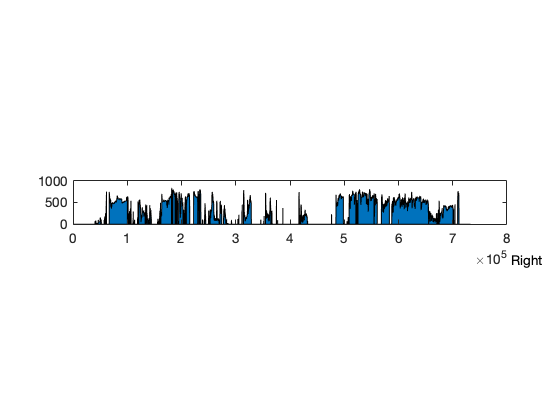

In [78]:
% subplot(5,1,1)
% area(fsr(:,1), fsr(:, 2))
% ylim([0 1000])
% annotation('textbox',[.9 .83 .15 .1],'String','Hold','EdgeColor','none')


% subplot(5,1,2)
% area(fsr(:,1), fsr(:, 3))
% annotation('textbox',[.9 .65 .15 .1],'String','Left','EdgeColor','none')

% subplot(5,1,3)
% area(fsr(:,1), fsr(:, 4))
% annotation('textbox',[.9 .48 .15 .1],'String','Down','EdgeColor','none')

% subplot(5,1,4)
area(fsr(:,1), fsr(:, 5))
annotation('textbox',[.9 .31 .15 .1],'String','Right','EdgeColor','none')
pbaspect([10 1 1])

% subplot(5,1,5)
% area(fsr(:,1), fsr(:, 6))
% annotation('textbox',[.9 .14 .15 .1],'String','Jump','EdgeColor','none')
% xlabel("(ms)")

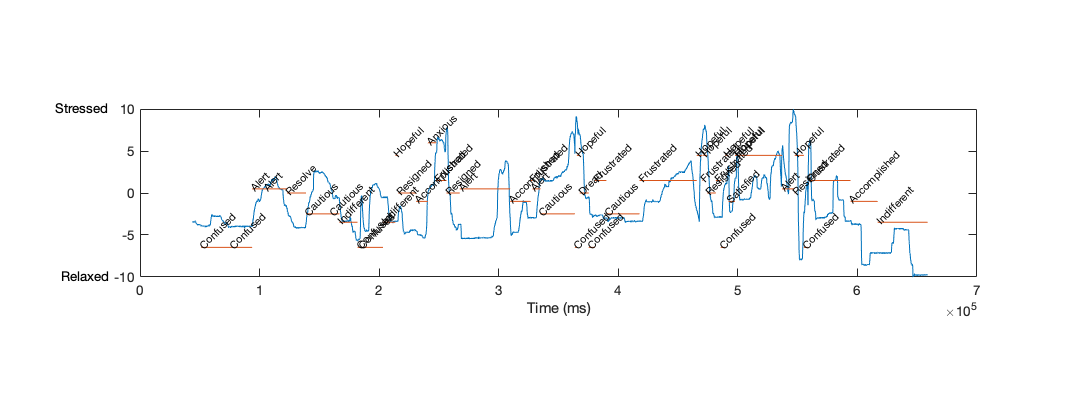

In [25]:
%plot inline -w 1080 -h 400

p2 = all_data{2, 1};
feeltrace2_10 = p2.joystick.joystick;
feeltrace2_10 = (feeltrace2_10 * 20 / ...
                (max(feeltrace2_10) - min(feeltrace2_10))) - 10;
f = figure();
plot(p2.joystick.timestamp_ms, feeltrace2_10)
hold on;
cali_2 = p2.calibrated_words;
for i = 1:(length(cali_2.calibrated_values)-1)
    line([cali_2.timestamp_ms(i) cali_2.timestamp_ms(i+1)], ones(2) * cali_2.calibrated_values(i))
end
line([cali_2.timestamp_ms(i+1) p2.joystick.timestamp_ms(end)], ones(2) * cali_2.calibrated_values(i+1))
% stairs(cali_2.timestamp_ms, cali_2.calibrated_values)
txt = text(p2.calibrated_words.timestamp_ms, cali_2.calibrated_values, cali_2.calibrated_words, 'FontSize', 8);
set(txt, 'Rotation', 45)
xlabel("Time (ms)")
annotation('textbox',[0.045 .66 .15 .1],'String','Stressed','EdgeColor','none')
annotation('textbox',[0.05 .24 .15 .1],'String','Relaxed','EdgeColor','none')

pbaspect([5 1 1])
saveas(f, 'p2_feeltrace_word_overlay.png')

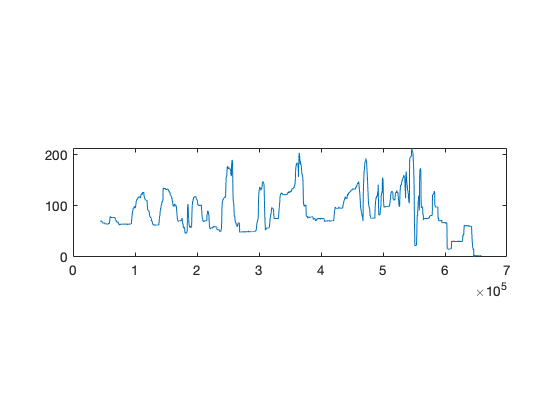

In [16]:
plot(feeltrace{:, 1}, feeltrace{:, 2})
pbaspect([4 1 1])


In [15]:
size(all_data{10,1}.eeg)


ans =

      877169           2



In [37]:
csv_dir = '../../converted_data/';
for i = 1:size(all_data,1)
    pfile = all_data{i,1};
    
    if ~isempty(pfile)
        filepath = strcat(csv_dir,pfile.scalars.trial_number);
        mkdir(filepath);
        
        eeg = pfile.eeg.eeg;
%         write to .mat
        save(strcat(filepath, '/', 'eeg.mat'), 'eeg');
%         write to .csv
%         writematrix(eeg,'eeg.csv');

        feeltrace = pfile.joystick{:,:};
%         write to .mat
        save(strcat(filepath, '/', 'feeltrace.mat'), 'feeltrace');
%         write to .csv
%         writematrix(feeltrace,'feeltrace.csv');
    end
end